In [ ]:
# Load Packages
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as dt
import matplotlib.pyplot as plt
#import yfinance as fyf
import datetime as dt
%matplotlib inline

In [ ]:
# Install yfinance and matplotlib package
!pip install yfinance
!pip install matplotlib
# Import yfinance and matplotlib
import yfinance as yf  
import matplotlib.pyplot as plt
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
stocks= ['HCL-INSYS.BO', 'QUICKHEAL.BO', 'PFIZER.BO', 'THYROCARE.BO', 'GREENPLY.BO', 'BATAINDIA.BO', 'INDIANB.BO', 'IIFL.BO']
data = yf.download(stocks,'2015-01-01','2021-08-06')
# Plot the close prices
#data["Adj Close"].plot()
#plt.show()

     |████████████████████████████████| 6.3 MB 9.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  8 of 8 completed


In [ ]:
df = data["Adj Close"]
df.head()

,BATAINDIA.BO,GREENPLY.BO,HCL-INSYS.BO,IIFL.BO,INDIANB.BO,PFIZER.BO,QUICKHEAL.BO,THYROCARE.BO
Date,,,,,,,,
2015-01-01,619.934875,150.130478,54.197205,80.274345,201.209930,1985.385498,NaN,NaN
2015-01-02,630.218933,152.445770,55.388351,80.985756,197.276291,2005.392212,NaN,NaN
2015-01-05,633.678711,155.276505,55.636509,82.844612,194.440414,2027.390625,NaN,NaN
2015-01-06,608.409851,153.024536,51.914173,78.690903,183.600037,2004.396484,NaN,NaN
2015-01-07,613.683105,150.492233,52.708271,76.005905,180.306778,2054.956543,NaN,NaN


In [ ]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,BATAINDIA.BO,GREENPLY.BO,HCL-INSYS.BO,IIFL.BO,INDIANB.BO,PFIZER.BO,QUICKHEAL.BO,THYROCARE.BO
BATAINDIA.BO,0.000338,0.000134,0.000169,0.000118,0.000162,0.000063,0.000149,0.000065
GREENPLY.BO,0.000134,0.000611,0.000190,0.000186,0.000188,0.000066,0.000173,0.000061
HCL-INSYS.BO,0.000169,0.000190,0.001224,0.000246,0.000311,0.000113,0.000307,0.000094
IIFL.BO,0.000118,0.000186,0.000246,0.000993,0.000230,0.000065,0.000182,0.000047
INDIANB.BO,0.000162,0.000188,0.000311,0.000230,0.000935,0.000097,0.000270,0.000061
PFIZER.BO,0.000063,0.000066,0.000113,0.000065,0.000097,0.000287,0.000083,0.000034
QUICKHEAL.BO,0.000149,0.000173,0.000307,0.000182,0.000270,0.000083,0.000909,0.000097
THYROCARE.BO,0.000065,0.000061,0.000094,0.000047,0.000061,0.000034,0.000097,0.000471


In [ ]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,BATAINDIA.BO,GREENPLY.BO,HCL-INSYS.BO,IIFL.BO,INDIANB.BO,PFIZER.BO,QUICKHEAL.BO,THYROCARE.BO
BATAINDIA.BO,1.000000,0.295547,0.261833,0.202854,0.287342,0.201191,0.275884,0.167362
GREENPLY.BO,0.295547,1.000000,0.220070,0.238456,0.248749,0.157638,0.231136,0.112967
HCL-INSYS.BO,0.261833,0.220070,1.000000,0.223285,0.290887,0.191307,0.306338,0.128812
IIFL.BO,0.202854,0.238456,0.223285,1.000000,0.238955,0.122659,0.182505,0.064243
INDIANB.BO,0.287342,0.248749,0.290887,0.238955,1.000000,0.188045,0.281127,0.088151
PFIZER.BO,0.201191,0.157638,0.191307,0.122659,0.188045,1.000000,0.163488,0.094005
QUICKHEAL.BO,0.275884,0.231136,0.306338,0.182505,0.281127,0.163488,1.000000,0.151694
THYROCARE.BO,0.167362,0.112967,0.128812,0.064243,0.088151,0.094005,0.151694,1.000000


In [ ]:
# Randomly weighted portfolio's variance
w = {'HCL-INSYS.BO': 0.15, 'QUICKHEAL.BO' : 0.2,'PFIZER.BO': 0.1, 'THYROCARE.BO': 0.1, 'GREENPLY.BO' : 0.1,'BATAINDIA.BO': 0.1, 'INDIANB.BO': 0.15, 'KTKBANK.BO' : 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00021146166538371788

In [ ]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

BATAINDIA.BO    0.264631
GREENPLY.BO     0.116763
HCL-INSYS.BO   -0.072318
IIFL.BO         0.442770
INDIANB.BO      0.199507
PFIZER.BO       0.207894
QUICKHEAL.BO    0.145938
THYROCARE.BO    0.213082
dtype: float64

In [ ]:
# Portfolio returns
w = [0.15, 0.2,0.1,0.1,0.1,0.1,0.15, 0.2]
port_er = (w*ind_er).sum()
port_er

0.205339622361711

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

BATAINDIA.BO    0.290839
GREENPLY.BO     0.390868
HCL-INSYS.BO    0.553261
IIFL.BO         0.498267
INDIANB.BO      0.483583
PFIZER.BO       0.267632
QUICKHEAL.BO    0.476631
THYROCARE.BO    0.343151
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
BATAINDIA.BO,0.264631,0.290839
GREENPLY.BO,0.116763,0.390868
HCL-INSYS.BO,-0.072318,0.553261
IIFL.BO,0.442770,0.498267
INDIANB.BO,0.199507,0.483583
PFIZER.BO,0.207894,0.267632
QUICKHEAL.BO,0.145938,0.476631
THYROCARE.BO,0.213082,0.343151


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    portfolios  = pd.DataFrame(data)
    
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BATAINDIA.BO weight,GREENPLY.BO weight,HCL-INSYS.BO weight,IIFL.BO weight,INDIANB.BO weight,PFIZER.BO weight,QUICKHEAL.BO weight,THYROCARE.BO weight
0,0.204454,0.220975,0.095197,0.152300,0.026963,0.096020,0.150652,0.155372,0.154502,0.168993
1,0.219441,0.219457,0.145009,0.178124,0.057851,0.164598,0.124832,0.173859,0.039590,0.116137
2,0.221476,0.228087,0.002379,0.210962,0.049228,0.213944,0.093197,0.178927,0.064135,0.187227
3,0.215392,0.285572,0.033254,0.027670,0.124518,0.251900,0.193298,0.052996,0.240690,0.075674
4,0.140747,0.268073,0.056893,0.184093,0.176232,0.040752,0.193856,0.101564,0.200180,0.046430


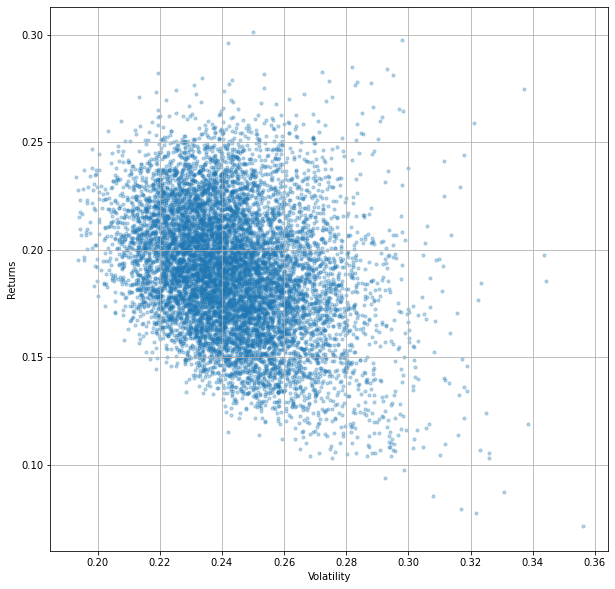

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                0.233770
Volatility             0.193000
BATAINDIA.BO weight    0.256854
GREENPLY.BO weight     0.041875
HCL-INSYS.BO weight    0.040863
IIFL.BO weight         0.109352
INDIANB.BO weight      0.023903
PFIZER.BO weight       0.273373
QUICKHEAL.BO weight    0.003445
THYROCARE.BO weight    0.250333
Name: 6124, dtype: float64

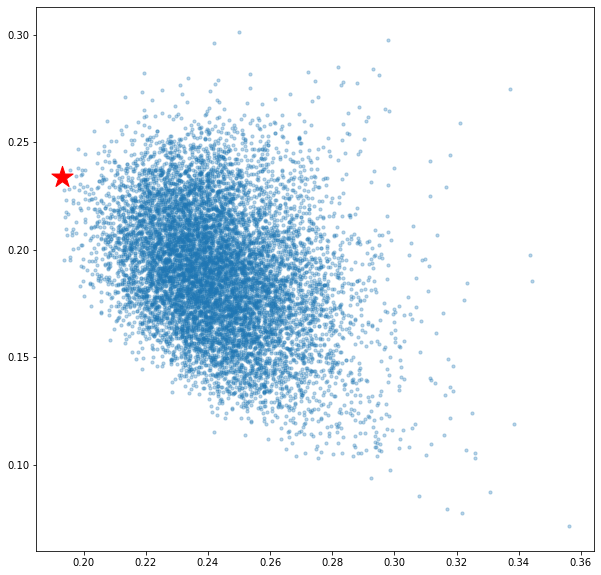

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                0.282372
Volatility             0.219526
BATAINDIA.BO weight    0.255179
GREENPLY.BO weight     0.013238
HCL-INSYS.BO weight    0.003467
IIFL.BO weight         0.269575
INDIANB.BO weight      0.059186
PFIZER.BO weight       0.256889
QUICKHEAL.BO weight    0.020583
THYROCARE.BO weight    0.121884
Name: 1331, dtype: float64

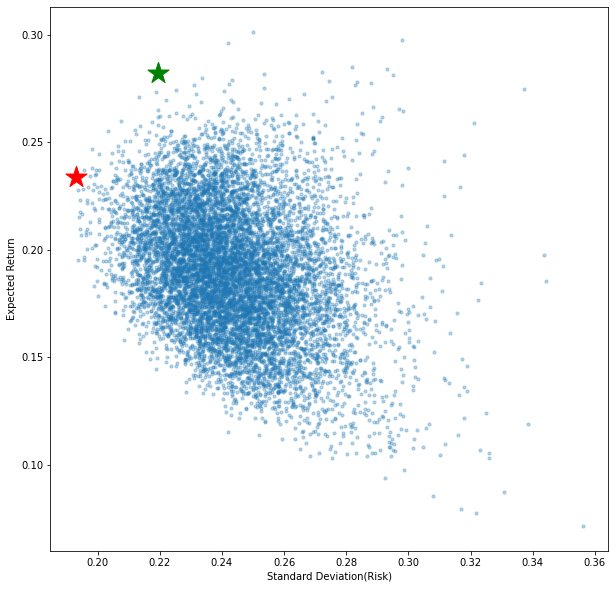

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.xlabel('Standard Deviation(Risk)')
plt.ylabel('Expected Return')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)